<a href="https://colab.research.google.com/github/brit228/DS-Unit-2-Sprint-4-Model-Validation/blob/master/DS_Unit_2_Sprint_Challenge_4_Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Data Science Unit 2 Sprint Challenge 4 — Model Validation

Follow the instructions for each numbered part to earn a score of 2. See the bottom of the notebook for a list of ways you can earn a score of 3.

## Predicting Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive.

The goal is to predict the last column, whether the donor made a donation in March 2007, using information about each donor's history. We'll measure success using recall score as the model evaluation metric.

Good data-driven systems for tracking and predicting donations and supply needs can improve the entire supply chain, making sure that more patients get the blood transfusions they need.

#### Run this cell to load the data:

In [239]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

df = df.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'total_volume_donated', 
    'Time (months)': 'months_since_first_donation', 
    'whether he/she donated blood in March 2007': 'made_donation_in_march_2007'
})

df.head()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Part 1.1 — Begin with baselines

What **accuracy score** would you get here with a **"majority class baseline"?** 
 
(You don't need to split the data into train and test sets yet. You can answer this question either with a scikit-learn function or with a pandas function.)

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, recall_score, roc_auc_score, confusion_matrix

X = df.drop(columns=["made_donation_in_march_2007"], axis=1)
y = df["made_donation_in_march_2007"]

y_pred = [y.mode() for i in range(len(y))]
print(accuracy_score(y,y_pred))
print(y.mode())

0.7620320855614974
0    0
dtype: int64


What **recall score** would you get here with a **majority class baseline?**

(You can answer this question either with a scikit-learn function or with no code, just your understanding of recall.)

In [245]:
print(recall_score(y,y_pred))

# This is as there are no positives predicted in this case, and as recall = TP/FN, recall = 0

0.0


## Part 1.2 — Split data

In this Sprint Challenge, you will use "Cross-Validation with Independent Test Set" for your model evaluation protocol.

First, **split the data into `X_train, X_test, y_train, y_test`**, with random shuffle. (You can include 75% of the data in the train set, and hold out 25% for the test set.)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Part 2.1 — Make a pipeline

Make a **pipeline** which includes:
- Preprocessing with any scikit-learn [**Scaler**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- Feature selection with **[`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)([`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html))**
- Classification with [**`LogisticRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [0]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

pipeline = Pipeline([('scale', StandardScaler()),
                    ('kbest', SelectKBest()),
                    ('model', LogisticRegression())])

## Part 2.2 — Do Grid Search Cross-Validation

Do [**GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with your pipeline. Use **5 folds** and **recall score**.

Include these **parameters for your grid:**

#### `SelectKBest`
- `k : 1, 2, 3, 4`

#### `LogisticRegression`
- `class_weight : None, 'balanced'`
- `C : .0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0`


**Fit** on the appropriate data.

In [209]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

params = {"kbest__k": [1,2,3,4],
         "model__class_weight": [None, 'balanced'],
         "model__C": [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]}

grid_model = GridSearchCV(pipeline, params, scoring='recall', cv=5, verbose=10)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] kbest__k=1, model__C=0.0001, model__class_weight=None ...........
[CV]  kbest__k=1, model__C=0.0001, model__class_weight=None, score=0.0, total=   0.0s
[CV] kbest__k=1, model__C=0.0001, model__class_weight=None ...........
[CV]  kbest__k=1, model__C=0.0001, model__class_weight=None, score=0.0, total=   0.0s
[CV] kbest__k=1, model__C=0.0001, model__class_weight=None ...........
[CV]  kbest__k=1, model__C=0.0001, model__class_weight=None, score=0.0, total=   0.0s
[CV] kbest__k=1, model__C=0.0001, model__class_weight=None ...........
[CV]  kbest__k=1, model__C=0.0001, model__class_weight=None, score=0.0, total=   0.0s
[CV] kbest__k=1, model__C=0.0001, model__class_weight=None ...........
[CV]  kbest__k=1, model__C=0.0001, model__class_weight=None, score=0.0, total=   0.0s
[CV] kbest__k=1, model__C=0.0001, model__class_weight=balanced .......
[CV]  kbest__k=1, model__C=0.0001, model__class_weight=balanced, score=0.730769230

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV] kbest__k=1, model__C=0.01, model__class_weight=None .............
[CV]  kbest__k=1, model__C=0.01, model__class_weight=None, score=0.0, total=   0.0s
[CV] kbest__k=1, model__C=0.01, model__class_weight=None .............
[CV]  kbest__k=1, model__C=0.01, model__class_weight=None, score=0.0, total=   0.0s
[CV] kbest__k=1, model__C=0.01, model__class_weight=balanced .........
[CV]  kbest__k=1, model__C=0.01, model__class_weight=balanced, score=0.7307692307692307, total=   0.0s
[CV] kbest__k=1, model__C=0.01, model__class_weight=balanced .........
[CV]  kbest__k=1, model__C=0.01, model__class_weight=balanced, score=0.6153846153846154, total=   0.0s
[CV] kbest__k=1, model__C=0.01, model__class_weight=balanced .........
[CV]  kbest__k=1, model__C=0.01, model__class_weight=balanced, score=0.9230769230769231, total=   0.0s
[CV] kbest__k=1, model__C=0.01, model__class_weight=balanced .........
[CV]  kbest__k=1, model__C=0.01, model__class_weight=balanced, score=0.8846153846153846, total=  

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    3.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=10, score_func=<function f_classif at 0x7ff201669400>)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kbest__k': [1, 2, 3, 4], 'model__class_weight': [None, 'balanced'], 'model__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=10)

## Part 3 — Show best score and parameters

Display your **best cross-validation score**, and the **best parameters** (the values of `k, class_weight, C`) from the grid search.

(You're not evaluated here on how good your score is, or which parameters you find. You're only evaluated on being able to display the information. There are several ways you can get the information, and any way is acceptable.)

In [210]:
print(grid_model.best_estimator_.score(X_test, y_test))
print(grid_model.best_params_)

0.5989304812834224
{'kbest__k': 2, 'model__C': 0.0001, 'model__class_weight': 'balanced'}


## Part 4 — Calculate classification metrics from a confusion matrix

Suppose this is the confusion matrix for your binary classification model:

<table>
  <tr>
    <th colspan="2" rowspan="2"></th>
    <th colspan="2">Predicted</th>
  </tr>
  <tr>
    <th>Negative</th>
    <th>Positive</th>
  </tr>
  <tr>
    <th rowspan="2">Actual</th>
    <th>Negative</th>
    <td>85</td>
    <td>58</td>
  </tr>
  <tr>
    <th>Positive</th>
    <td>8</td>
    <td>36</td>
  </tr>
</table>

Calculate accuracy

In [211]:
conf_mat = pd.DataFrame([[85,58],[8,36]], columns=["Negative", "Positive"], index=["Negative", "Positive"])

accuracy = (conf_mat.loc["Positive"]["Positive"] + conf_mat.loc["Negative"]["Negative"]) / (conf_mat["Positive"].sum() + conf_mat["Negative"].sum())
print(accuracy)

0.6470588235294118


Calculate precision

In [212]:
precision = conf_mat.loc["Positive"]["Positive"] / (conf_mat.loc["Positive"]["Positive"] + conf_mat.loc["Negative"]["Negative"])
print(precision)

0.2975206611570248


Calculate recall

In [213]:
recall = conf_mat.loc["Positive"]["Positive"] / (conf_mat.loc["Positive"]["Positive"] + conf_mat.loc["Positive"]["Negative"])
print(recall)

0.8181818181818182


## BONUS — How you can earn a score of 3

### Part 1
Do feature engineering, to try improving your cross-validation score.

### Part 2
Add transformations in your pipeline and parameters in your grid, to try improving your cross-validation score.

### Part 3
Show names of selected features. Then do a final evaluation on the test set — what is the test score?

### Part 4
Calculate F1 score and False Positive Rate. 

In [214]:
# Part 1
for c in X_train:
  df["inv_{}".format(c)] = 1.0 / df[c]
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

X = df.drop(columns=["made_donation_in_march_2007"], axis=1)
y = df["made_donation_in_march_2007"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

df.describe()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007,inv_months_since_last_donation,inv_number_of_donations,inv_total_volume_donated,inv_months_since_first_donation
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,9.570659,5.481830,1370.457604,34.282638,0.236878,0.226210,0.403317,0.001613,0.075726
std,8.084797,5.801002,1450.250487,24.342033,0.425453,0.194121,0.337555,0.001350,0.113328
min,1.000000,1.000000,250.000000,2.000000,0.000000,0.013514,0.020000,0.000080,0.010204
25%,3.000000,2.000000,500.000000,16.000000,0.000000,0.071429,0.142857,0.000571,0.020000
50%,8.000000,4.000000,1000.000000,28.000000,0.000000,0.125000,0.250000,0.001000,0.035714
75%,14.000000,7.000000,1750.000000,50.000000,0.000000,0.333333,0.500000,0.002000,0.062500
max,74.000000,50.000000,12500.000000,98.000000,1.000000,1.000000,1.000000,0.004000,0.500000


In [0]:
# Part 2

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class GaussianFeatures(BaseEstimator, TransformerMixin):
  """Uniformly spaced Gaussian features for one-dimensional input"""

  def __init__(self, N=2, width_factor=2.0):
    self.N = N
    self.width_factor = width_factor

  @staticmethod
  def _gauss_basis(x, y, width, axis=None):
    arg = (x - y) / width
    return np.exp(-0.5 * np.sum(arg ** 2, axis))

  def fit(self, X, y=None):
    # create N centers spread along the data range
    self.centers_ = np.zeros((self.N, X.shape[1]))
    self.width_ = np.zeros(X.shape[1])
    for i in range(X.shape[1]):
      self.centers_[:,i] = np.linspace(X[:,i].min(), X[:,i].max(), self.N)
      self.width_[i] = self.width_factor * (self.centers_[1,i] - self.centers_[0,i])
    return self

  def transform(self, X):
    out = np.zeros((X.shape[0], self.N * X.shape[1]))
    for i in range(X.shape[1]):
      out[:,i] = self._gauss_basis(X[:, i, np.newaxis], self.centers_[:,i], self.width_[i], axis=1)
    return out

In [235]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV

pipeline = Pipeline([('scale', StandardScaler()),
                    ('features', FeatureUnion([("poly", PolynomialFeatures()), ("gauss", GaussianFeatures())])),
                    ('kbest', SelectKBest()),
                    ('model', LogisticRegression())])

params = {"kbest__k": [i for i in range(5,20+1,5)],
         "model__class_weight": [None, 'balanced'],
         "model__C": [.0001, .01, 1.0, 100.00, 10000.0],
         "features__poly__degree": [1,2,3],
         "features__gauss__N": [i for i in range(2,5+1,1)]}

grid_model = GridSearchCV(pipeline, params, scoring='recall', cv=5, verbose=10)
grid_model.fit(X_train, y_train)

print(grid_model.best_score_)
print(grid_model.best_params_)
# pipe = grid_model.best_estimator_

# def transform(pipe, X):
#   x = X.copy()
#   for i in pipe.steps:
#     if i[0] != "model":
#       x = i[1].transform(x)
#   return x

# RFECV_model = RFECV(grid_model.best_estimator_.named_steps["model"], cv=5, verbose=1)
# RFECV_model.fit(transform(pipe, X_train), y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.0001, model__class_weight=None 
[CV]  features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.0001, model__class_weight=None, score=0.037037037037037035, total=   0.0s
[CV] features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.0001, model__class_weight=None 
[CV]  features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.0001, model__class_weight=None, score=0.07407407407407407, total=   0.0s
[CV] features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.0001, model__class_weight=None 
[CV]  features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.0001, model__class_weight=None, score=0.0, total=   0.0s
[CV] features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.0001, model__class_weight=None 
[CV]  features__gauss__N=2, features__poly__degree=1, kbest__k=5, mod

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.01, model__class_weight=balanced, score=0.6296296296296297, total=   0.0s
[CV] features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.01, model__class_weight=balanced 
[CV]  features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.01, model__class_weight=balanced, score=0.7407407407407407, total=   0.0s
[CV] features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.01, model__class_weight=balanced 
[CV]  features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.01, model__class_weight=balanced, score=0.7307692307692307, total=   0.0s
[CV] features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.01, model__class_weight=balanced 
[CV]  features__gauss__N=2, features__poly__degree=1, kbest__k=5, model__C=0.01, model__class_weight=balanced, score=0.8461538461538461, total=   0.0s
[CV] features__gauss__N=2, features__poly__degree=1, kbest__k=5, m

[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   41.7s finished


In [237]:
# Part 3

print(grid_model.score(X_test, y_test))
print(grid_model.best_params_)

model = grid_model.best_estimator_
features = model.named_steps["features"].transformer_list[0][1].get_feature_names(list(X_train)) + ["{}_g{}".format(x,i) for x in X_train for i in range(grid_model.best_params_['features__gauss__N'])]
features = [x for i,x in enumerate(features) if model.named_steps["kbest"].get_support()[i]]
model = model.named_steps["model"]
coef = model.coef_[0]
indexes = features
if model.intercept_:
  indexes = ["Intercept"] + indexes
  coef = np.concatenate([model.intercept_, coef])
coef_out = pd.DataFrame(np.array([coef, np.abs(coef)]).T, columns=["Coefficients", "abs(Coefficients)"], index=indexes)
coef_out.sort_values(by="abs(Coefficients)", ascending=False)

0.75
{'features__gauss__N': 2, 'features__poly__degree': 3, 'kbest__k': 10, 'model__C': 1.0, 'model__class_weight': 'balanced'}


,Coefficients,abs(Coefficients)
months_since_last_donation,-0.910269,0.910269
months_since_last_donation_g0,-0.159022,0.159022
number_of_donations,0.136164,0.136164
total_volume_donated,0.136164,0.136164
Intercept,-0.130567,0.130567
inv_months_since_last_donation,0.085638,0.085638
total_volume_donated_g0,0.019093,0.019093
months_since_last_donation total_volume_donated inv_number_of_donations,0.005469,0.005469
months_since_last_donation number_of_donations inv_number_of_donations,0.005469,0.005469
months_since_last_donation total_volume_donated inv_total_volume_donated,0.005469,0.005469


([array([24.,  1., 13., 16., 16.,  4.,  1.,  3., 25.,  0.,  1.,  0., 34.,
          0.,  0.,  0.,  0.,  0.,  0.,  4.]),
  array([25.,  2., 14., 18., 21.,  5.,  1.,  4., 38.,  0.,  4.,  0., 50.,
          0.,  0.,  0.,  0.,  0.,  0.,  4.])],
 array([0.45064736, 0.45805023, 0.4654531 , 0.47285597, 0.48025884,
        0.4876617 , 0.49506457, 0.50246744, 0.50987031, 0.51727318,
        0.52467605, 0.53207892, 0.53948179, 0.54688466, 0.55428752,
        0.56169039, 0.56909326, 0.57649613, 0.583899  , 0.59130187,
        0.59870474]),
 <a list of 2 Lists of Patches objects>)

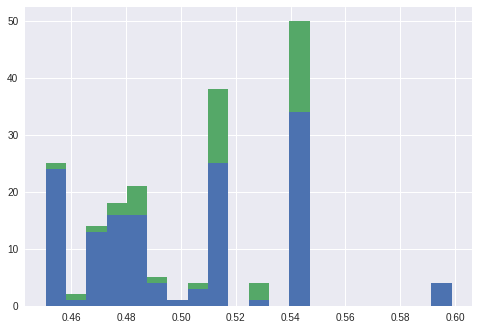

In [238]:
import matplotlib.pyplot as plt

y_pred = RFECV_model.predict_proba(transform(pipe, X_test))[:,-1]
plt.hist([y_pred[y_test == 0], y_pred[y_test == 1]], stacked=True, bins=20)

In [225]:
# Part 4

F1 = 2.0 * (precision * recall) / (precision + recall)
print("F1 Score:", F1)

FPR = conf_mat.loc["Negative"]["Positive"] / conf_mat["Negative"].sum()
print("False Positive Rate:", FPR)

F1 Score: 0.4363636363636364
False Positive Rate: 0.6236559139784946
